# Decay Simulator

Modeling supply & inflation rate for different decay curves

In [203]:
# Modules
import pandas as pd
import matplotlib as mpl

# DECAY FUNCTIONS
def inflation_decay(year, supply, infl):
    if infl <= target_infl:
        rates.append([year, supply, target_infl])
        for i in range(0,year):
            rates.append([year+i, supply, target_infl])
            supply += supply*target_infl
        return
    rates.append([year, supply, infl])
    inflation_decay(year + 1, supply+supply*infl, infl-decay_rate)
    
def block_reward_halving(block, supply, block_reward):
    if block_reward <= 1:
        for i in range(0,int(block/2)):
            arr.append([block+i,supply,0])
        return
    arr.append([block, supply, block_reward])
    if block%half_life==0:
        block_reward /= 2
    return block_reward_halving(block+1, supply+block_reward, block_reward)

# HELPER FUNCTIONS
def format_graph(df): 
    left = df['supply'].plot(color='blue')
    left.set_ylabel('ACX Supply')
    left.yaxis.label.set_color('blue')
    right = df['inflation'].plot(secondary_y=['inflation'], color='orange')
    right.set_ylabel('Inflation Rate')
    right.yaxis.label.set_color('orange')


In [194]:
initial_supply = 50
initial_infl = 0.1
decay_rate = 0.005

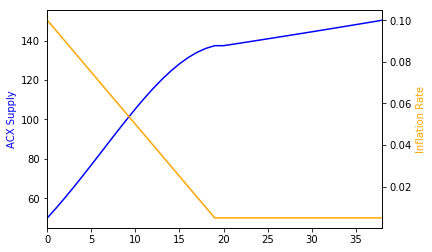

In [195]:
target_infl = 0.005
rates = []
inflation_decay(0, initial_supply, initial_infl)
df = pd.DataFrame(rates,  columns=['year', 'supply', 'inflation'])
#df
format_graph(df)
mpl.pyplot.show()

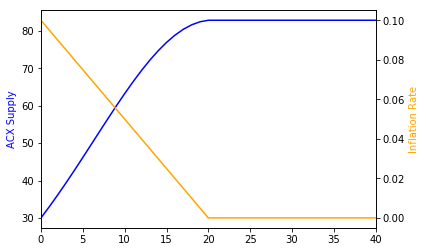

In [179]:
target_infl = 0
rates = []
inflation_decay(0, initial_supply, initial_infl)
df = pd.DataFrame(rates,  columns=['year', 'supply', 'inflation'])
#df
format_graph(df)
mpl.pyplot.show()

In [1]:
# arr = []
# half_life = 210
# block_reward_halving(0, 0, 50.0)
# df = pd.DataFrame(rates,  columns=['year', 'supply', 'inflation'])
# #df
# format_graph(df)
# mpl.pyplot.show()